# Introduction - Business Problem

After finishing our Computer Science studies at Berkeley, we had a great idea and developed a prototype of a pair of augmented reality glasses with full 5G connectivity, bluetooth and a GPS chipset.
We avoided to include any camera on it (as Google Glasses) and focusing on social media streaming (as the first version of Google ones) or focusing in enterprises (like the latest one).
The reason is that we have identified geolocation as our niche market and we want to focus on it.

In the process of creating the prototype, we did some proof of concepts with different APIs and we observed that there are lot of functionalities we can offer to the users. 
Some examples for which we implemented proof of concepts:

* Strava integration - Strava is the most used APP by runners around the world and after some exploratory testing with the Strava API, we realized our glasses are able to:
    + show to the user very useful data while he or she is running, like: velocity, minutes per mile, distance, heart rate, etc...
    + show them routes previously defined in their user profile or the most popular routes around them
    + show the user "kudos" (cheers) given by their friends in real time


* Google Maps integration - Our glasses are able to integrate with the Google Maps API and we can implement very interesting features:
    + navigate through maps while driving without needing to take the eyes off the road
    + showing interesting/historical points in a city (very useful for tourists)
    + showing interesting restaurants/venues around them when required


* ESPN Sports live stats integration - Our glasses are able to show live sports stats/scores through the ESPN API
    + show live scores for matches of the major leagues in the USA (NFL, NBA, NHL and MLB)
    + show live stats when attending to any event like a Lakers or GSW game
    + show time differences between different cars in a Nascar race


* Disney Parks - As ESPN is part of the Disney emporium, they were impressed by our glasses and ask us to implement as well:
    + navigation through Disney parks, starting with Magic Kingdom in Orland as a proof of concept
    + real time stats on waiting times for the park attractions, so the users can optimize their time in the park


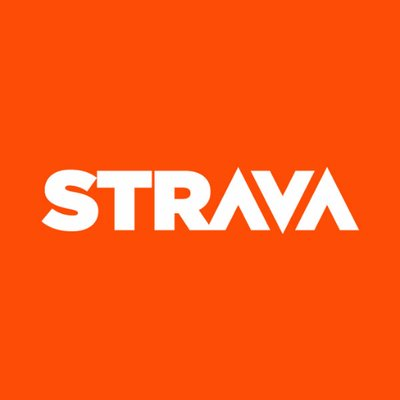 


So, after creating our prototype, we had several appointments with some of the biggest tech companies (including these 3 ones, plus Apple, Microsoft, etc...) in order to show them what our glasses are capable of.
Almost all of them were very interested and after a funding round, some of them decided to invest in our project and create a partnership with us in order to develop the final product and implement lots of features in them.
    

We have launched a brand new start-up company named *Aviato GeoGlasses Inc* and collected 20 millions from our 4 main investors (Apple, Strava, Google, Disney-ESPN) in exchange of 5% of the shares of the company for each one of them.

Now that we have the necessary funding, our next step is to hire 30 engineers, 10 marketing people and additional 10 support staff people (Human Resources, legal advisors, etc...).
However, before doing that, we need to **look for the best place where our offices will be located** and that is the purpose of this work.

In order to define where we think is the best place to locate our offices, we have done an brainstorming session and came to the following conclusion:

* we want to locate our offices in the San Francisco Bay Area
    + there is a lot of personal talent around the bay (graduates from Berkeley, Standford, etc... and engineers working in other tech companies) so we want to attract that people
    + most of our partners are located around this area
    + there are lots of potentials new partners (big technological companies and lots of other startups) around the bay

As we want to accelerate this process and start hiring people and working in the final product as soon as possible, we have decided that we don't want to spend lots of time visiting all the cities around the bay (101 municipalities) searching for the best city/town to locate our offices.

As we have some expertice working as Data scientists, we are going to use our knowledge to reduce the list of possible locations to only a bunch of locations around the bay and we will only need to visit the list of final candidates.

So, we have done another brainstorming session in order to clarify which are the requirements we are looking for.
As a result of that session, we have come to the following requirements for the location:

* we want that our offices are located around the center of the selected city
    + want to feel the "vibe" of the city 
    + avoid ugly and noisy industrial parks
    + avoid residential neighbourhoods where there are no venues around (restaurants, gyms, etc...) 


* we want to locate our office in a town with a reasonable population number
    + want to avoid very busy/turistic cities with a big population like San Francisco
    + at same time we want to avoid very little towns with a very small population
    
    
* we believe our employees will be more creative and efficient if they have interesting venues around
    + we don't believe that working 10 hours without interacting with anybody is a good practice
    + will look for places with restaurants around, so our employees can go for a lunch and socialize
    + will look for places with gyms or other sports facilities around
    + not mandatory, but nice to have, some bars around so our employees can go for a drink after work with other colleagues


* we are looking for cities that have some train or bus station around the city center
    + in order to facilitate our employees to come to the office from other cities around the bay


* in case there are too many cities fulfilling the previous requirements, we will use as a filter having other kinds of venues around:
    + parks, schools, cinemas, shopping malls, etc...
    + can attract more people to our company and maybe they decided to rent/buy an apartment/house and live in the selected city


# Data adquisition

Now that have defined our problem to solve, we need to start looking for the data required and the data sources that will provide it.

## List of municipalities around SF Bay area

As a first step, we need a dataset containing the list of municipalities around the San Francisco Bay Area.  
We can find that information in the Wikipedia: https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_the_San_Francisco_Bay_Area

As the information is presented in a table (HTML format), we can use Pandas and Beautiful Soup functionalities in order to retrieve the information.  
That table will contain:
* Name
* Type (City, Town, etc...)
* County
* Population
* Land Area
* Incorporation date

In [20]:
# The code was removed by Watson Studio for sharing.

In [19]:
!pip install folium==0.5.0
import folium # plotting library

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 79 kB 10.6 MB/s eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=604a895301e4c7a65aa45776c7f0b80969d12c892c1921729422cfc756c4d1cb
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium


In [2]:
#Download the html from the URL and convert into a BeautifulSoup object
url='https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_the_San_Francisco_Bay_Area'
html_data  = requests.get(url).text 
soup_object = BeautifulSoup(html_data,"html5lib")  # create a soup object using the variable 'html_data'

In [3]:
soup_object = BeautifulSoup(html_data,"html5lib")  # create a soup object using the variable 'html_data'
#Extract the tables/table
wiki_tables = soup_object.find_all('table')

#Use pandas to transform the table into a dataframe
wiki_df = pd.read_html(str(wiki_tables[1]),flavor='bs4')[0]

In [4]:
#Need to rename the headers, in the original table there are 2 levels
wiki_df.columns = ['Name','Type','County','Population','Land area - sq mi','Land area - km2','Incorporated']
wiki_df.head()

,Name,Type,County,Population,Land area - sq mi,Land area - km2,Incorporated
0,Alameda,City,Alameda,73812,10.61,27.5,"April 19, 1854"
1,Albany,City,Alameda,18539,1.79,4.6,"September 22, 1908"
2,American Canyon,City,Napa,19454,4.84,12.5,"January 1, 1992"
3,Antioch,City,Contra Costa,102372,28.35,73.4,"February 6, 1872"
4,Atherton,Town,San Mateo,6914,5.02,13.0,"September 12, 1923"


As we are only interested in the name of the city/town and the population, we are going to remove the rest of the columns (except for county column, we will see later that we need that one as 
well).

Additionally, we are going to apply the "reasonable population" filter that we defined as a requisite in our analysis.
In concrete, we are are going to remove from our data:
* Big cities, with population bigger than 120000 citizens
* Small towns, with population less than 20000 citizens

In [5]:
wiki_df.drop(['Type','Land area - sq mi','Land area - km2','Incorporated'],axis=1,inplace=True)

In [6]:
wiki_df.head()

,Name,County,Population
0,Alameda,Alameda,73812
1,Albany,Alameda,18539
2,American Canyon,Napa,19454
3,Antioch,Contra Costa,102372
4,Atherton,San Mateo,6914


In [7]:
wiki_df_final = wiki_df[(wiki_df['Population']>20000) & (wiki_df['Population']<150000)]
wiki_df_final.reset_index(inplace=True)

In [8]:
wiki_df_final.drop(['index'],axis=1,inplace=True)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
print(wiki_df_final.shape)
wiki_df_final.head()

(60, 3)


,Name,County,Population
0,Alameda,Alameda,73812
1,Antioch,Contra Costa,102372
2,Belmont,San Mateo,25835
3,Benicia,Solano,26997
4,Berkeley,Alameda,112580


As we can observe, with the population filter, we have reduced the number of municipalities that could fit our requirements from the original 101 municipalities into 60.

Now we will continue the analysis in order to refine the list and reduce the number of potential candidates.

## Longitude and Latitude for each city

We have decided to use the FourSquare API as the service that will provide the list of venues around the city centers of the selected cities.
In order to be able to use that API, we first need to retrieve the coordinates for each city center.

We are going to use the Geopy-Nominatim Python package in order to get those longitudes and latitudes required.
We will loop through the cities and retrieve the coordinates for each one of them.

In [10]:
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [15]:
geolocator = Nominatim(user_agent="SFBay_Explorer")
coordinates_df = pd.DataFrame(columns=['Name', 'County','Latitude', 'Longitude'])

for name,county in zip(wiki_df_final['Name'], wiki_df_final['County']):
    #In order to create the address, add state name (California) to the town name
    address = name + ' ,California'
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    coordinates_df = coordinates_df.append({'Name': name, 'County':county, 'Latitude' : latitude, 'Longitude': longitude}, ignore_index=True)
    print('The geograpical coordinate of {} are {}, {}.'.format(name, latitude, longitude))

coordinates_df

The geograpical coordinate of Alameda are 37.6090291, -121.899142.
The geograpical coordinate of Antioch are 38.0049214, -121.805789.
The geograpical coordinate of Belmont are 37.5164926, -122.2941914.
The geograpical coordinate of Benicia are 38.049365, -122.1585777.
The geograpical coordinate of Berkeley are 37.8708393, -122.2728639.
The geograpical coordinate of Brentwood are 37.9317766, -121.6960266.
The geograpical coordinate of Burlingame are 37.5841026, -122.3660825.
The geograpical coordinate of Campbell are 37.2870626, -121.9448818.
The geograpical coordinate of Concord are 37.9768525, -122.0335624.
The geograpical coordinate of Cupertino are 37.3228934, -122.0322895.
The geograpical coordinate of Daly City are 37.6904826, -122.4726708.
The geograpical coordinate of Danville are 37.8215929, -121.9999606.
The geograpical coordinate of Dublin are 37.7021521, -121.9357918.
The geograpical coordinate of East Palo Alto are 37.4688273, -122.1410751.
The geograpical coordinate of El 

,Name,County,Latitude,Longitude
0,Alameda,Alameda,37.609029,-121.899142
1,Antioch,Contra Costa,38.004921,-121.805789
2,Belmont,San Mateo,37.516493,-122.294191
3,Benicia,Solano,38.049365,-122.158578
4,Berkeley,Alameda,37.870839,-122.272864
5,Brentwood,Contra Costa,37.931777,-121.696027
6,Burlingame,San Mateo,37.584103,-122.366083
7,Campbell,Santa Clara,37.287063,-121.944882
8,Concord,Contra Costa,37.976852,-122.033562
9,Cupertino,Santa Clara,37.322893,-122.032290


As we want to make sure that the coordinates for each town corresponds to the city center, we are going to print in the San Francisco Bay map each city center location with a marker.
In order to do that, we will use Folium package for Python.

In [30]:
#Create the map centered in the San Francisco Bay
bay_address = 'San Francisco Bay, California'
bay_location = geolocator.geocode(bay_address)
bay_latitude = bay_location.latitude
bay_longitude = bay_location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(bay_address, bay_latitude, bay_longitude))
SFBay_map = folium.Map(location=[bay_latitude, bay_longitude], zoom_start=9)

#Add markers for each location
for lat, lng, name, county in zip(coordinates_df['Latitude'], coordinates_df['Longitude'], coordinates_df['Name'],coordinates_df['County']):
    label = '{}, {}'.format(name, county)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(SFBay_map)  

SFBay_map

The geograpical coordinate of San Francisco Bay, California are 37.71402905, -122.30779415179862.


We can observe in the map that there are a few points that are located in the supposed center of the city. Those cities are Alameda, Santa Clara, San Mateo and Petaluma.
The reason for the first 3 (Alameda, Santa Clara and San Mateo) is that the county they are located have the same name and Nominatim library is returning the coordinates of the geographical county center. 
In the case of Petaluma, the coordinates are pointing to a piece of land belonging to the city but enclosed in another muncipality term.
In any case, we are going to fix the coordinates for these 4 anomalies looking for the coordinates of the Town Hall, which is usually located at the city center of each location.

In [35]:
address = 'Santa Clara Downtown, California'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of are 37.3363493, -121.8900141.
